In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def remove_background_expand_image(image_path: str) -> None:

    # load and convert image from BGR to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    plt.imshow(image_hsv)

    # Define range of green color in HSV
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(image_hsv, lower_green, upper_green)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Smooth the mask
    kernel = np.ones((5,5),np.uint8)
    mask_smoothed = cv2.morphologyEx(mask_inv, cv2.MORPH_CLOSE, kernel)

    # Create a uniformed background
    background_color = (200, 200, 200)
    uniformed_background = np.full_like(image, background_color, dtype=np.uint8)

    # Bitwise AND of the black background and the mask
    foreground = cv2.bitwise_and(uniformed_background, uniformed_background, mask=mask)

    # Bitwise AND of the image and the mask
    background = cv2.bitwise_and(image, image, mask=mask_smoothed)

    # Combine foreground and background
    combined = cv2.add(foreground, background)

    # create new image of shape 300x300
    height, width = image.shape[:2]
    new_height = height + 100
    new_image = np.zeros((new_height, width, 3), np.uint8)
    expanded_image = np.full_like(new_image, background_color, dtype=np.uint8)

    # Calculate the position to paste the result image for centering
    paste_y = int((new_height - height) / 2)

    # Paste the result onto the expanded image (centered vertically)
    expanded_image[paste_y:paste_y+height, 0:width] = combined

    # Rotate the image 90 degrees to the left
    rotated_image = cv2.rotate(expanded_image, cv2.ROTATE_90_CLOCKWISE)

    # Save image
    new_path = image_path.replace('.png', '_.png')
    print('Saved: ', new_path)
    cv2.imwrite(new_path, rotated_image)


In [35]:
def display_image(path: str) -> None:
    image = cv2.imread('scissors_green_.png')
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

Saved:  scissors_green_.png


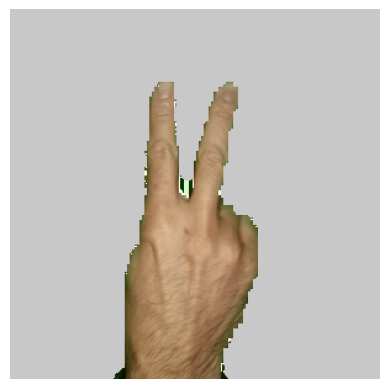

In [36]:
remove_background_expand_image('scissors_green.png')
display_image('scissors_green_nobkg.png')


Saved:  dataset\zips\archive\paper\04l5I8TqdzF9WDMJ_.png
Saved:  dataset\zips\archive\paper\0a3UtNzl5Ll3sq8K_.png
Saved:  dataset\zips\archive\paper\0cb6cVL8pkfi4wF6_.png
Saved:  dataset\zips\archive\paper\0eqArS2GgsBeqgSn_.png
Saved:  dataset\zips\archive\paper\0Og76sl5CJhbxWWx_.png
Saved:  dataset\zips\archive\paper\0RA9rcrv8iVvuDDU_.png
Saved:  dataset\zips\archive\paper\0t08v9bAaA0mXGCQ_.png
Saved:  dataset\zips\archive\paper\0Uomd0HvOB33m47I_.png
Saved:  dataset\zips\archive\paper\0vugygEjxQJPr9yz_.png
Saved:  dataset\zips\archive\paper\0zKU6wEhT2cDe9j0_.png
Saved:  dataset\zips\archive\paper\14K62H4KG1hg5qiJ_.png
Saved:  dataset\zips\archive\paper\1Dfw5FRlS4h60JPX_.png
Saved:  dataset\zips\archive\paper\1fKclJk4eBWOQSR1_.png
Saved:  dataset\zips\archive\paper\1Frbe8cdOdkciOBg_.png
Saved:  dataset\zips\archive\paper\1jHtb93pI8f6pfKo_.png
Saved:  dataset\zips\archive\paper\1oKnUgV2CdCaQUUX_.png
Saved:  dataset\zips\archive\paper\1Tt9U9SzrOm98Xtw_.png
Saved:  dataset\zips\archive\pa

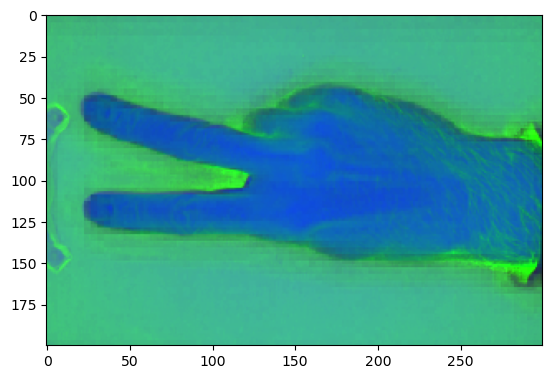

In [38]:
folders = [
    r'dataset\zips\archive\paper',
    r'dataset\zips\archive\rock',
    r'dataset\zips\archive\scissors',
]

for dir in folders:
    for img in [_ for _ in os.listdir(dir) if _.endswith('.png')]:
        remove_background_expand_image(os.path.join(dir, img))